In [2]:
import matplotlib.pyplot as plt
import wandb
import torch
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from tqdm.auto import tqdm


/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
api = wandb.Api()


In [4]:
iterations_per_epoch = {
    'FishTox': 12,
    'SIDER': 18,
}

In [61]:

run_info = []
results = []

runs = [run for run in api.sweep('mfederici/infomol/x57ffect').runs]

for run in tqdm(runs):
    if run.state != 'finished':
        print(run.id, run.state)
    else:
        hidden_dims = run.config['h_dim']
        fold = run.config['fold']
        fingerprinter = run.config['fingerprinter']
        dataset = run.config['dataset']['_target_'].split('.')[-1]
        r_idx = run.id
        
        epochs = run.summary['epoch']
        iterations = run.summary['iteration']
        patience = run.config['estimation']['patience']
        min_step = (epochs-patience)*iterations_per_epoch[dataset]
        valid_mi = next(
            run.scan_history(
                keys=['valid/mutual_information', 'epoch'], 
                min_step=min_step, max_step=min_step+iterations_per_epoch[dataset])
        )['valid/mutual_information']
        
        train_mi = next(
            run.scan_history(
                keys=['train/mutual_information', 'epoch'], 
                min_step=min_step, max_step=min_step+100)
        )['train/mutual_information']
        
        run_info.append({
            'hidden_dims': hidden_dims,
            'fold': fold,
            'fingerprinter': fingerprinter,
            'dataset': dataset,
            'r_idx': r_idx,
            'epochs': epochs-patience,
            'iterations': iterations-patience*iterations_per_epoch[dataset]
        })
        
        test_mi = run.summary['test/mutual_information']
        
        for split, value in [
            ('train', train_mi), 
            ('valid', valid_mi), 
            ('test', test_mi)
        ]:
            results.append({
                'r_idx': r_idx,
                'split': split,
                'mutual_information': value
            })
        
run_info = pd.DataFrame(run_info)
results = pd.DataFrame(results)

100%|██████████| 280/280 [03:56<00:00,  1.18it/s]


In [62]:
# run_info.to_csv('cached_results/fistox_base_run_info.csv')
# results.to_csv('cached_results/fistox_base_results.csv')

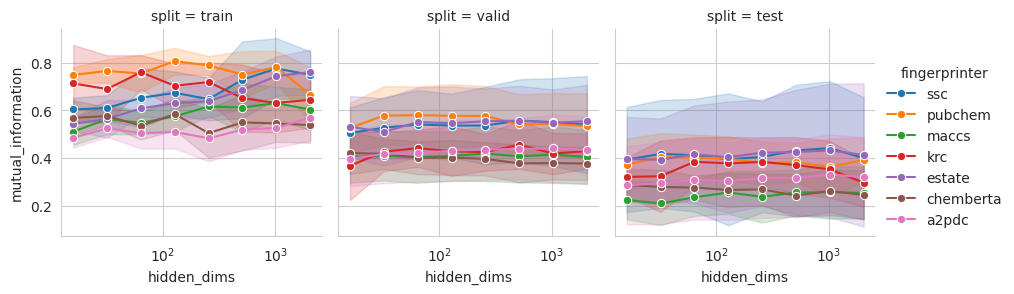

In [72]:
grid = sns.FacetGrid(run_info.merge(results, on='r_idx'), hue='fingerprinter', col='split')
grid.map(sns.lineplot, 'hidden_dims', 'mutual_information', marker='o', errorbar='sd')
grid.axes[0,0].set_xscale('log')
grid.add_legend()
plt.savefig('figures/fishtox_hidden_dims.png')

/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/tmp/ipykernel_28470/2943591839.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_28470/2943591839.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_28470/2943591839.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


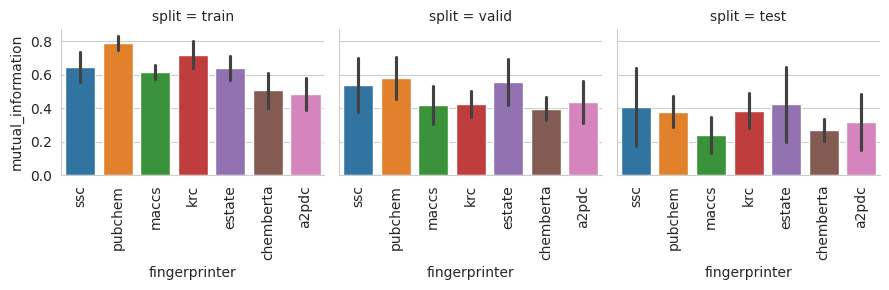

In [75]:
J = run_info.merge(results, on='r_idx')
J = J[J['hidden_dims']==256]
grid = sns.FacetGrid(J, hue='fingerprinter', col='split')
grid.map(sns.barplot, 'fingerprinter', 'mutual_information', errorbar='sd')
for ax in grid.axes[0]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('figures/fishtox_base.png')

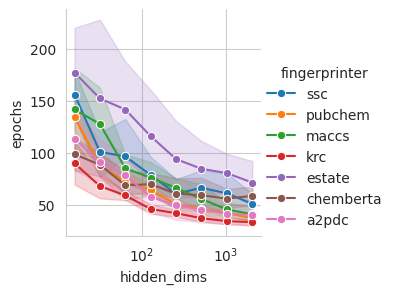

In [26]:
grid = sns.FacetGrid(results, hue='fingerprinter')
grid.map(sns.lineplot, 'hidden_dims', 'epochs', marker='o', errorbar='sd')
grid.axes[0,0].set_xscale('log')
grid.add_legend()
plt.savefig('figures/fishtox_training_time.png')

In [58]:

d

{'valid/mutual_information': 0.4677644148468971, 'epoch': 137}

In [56]:
d = [r for r in run.scan_history(keys=['valid/mutual_information', 'epoch'], min_step=min_step, max_step=min_step+iterations_per_epoch[dataset])]
d, run.summary['epoch']-patience

([{'valid/mutual_information': 0.4677644148468971, 'epoch': 137}], 137)

In [43]:
min_step, max_step

(1644, 1668)

In [5]:

run_info = []
results = []

runs = [run for run in api.sweep('mfederici/infomol/zmv727rt').runs]


dataset = "SIDER"
for run in tqdm(runs):
    if run.state != 'finished':
        print(run.id, run.state)
    else:
        hidden_dims = run.config['h_dim']
        fold = run.config['fold']
        fingerprinter = run.config['fingerprinter']
        r_idx = run.id
        
        epochs = run.summary['epoch']
        iterations = run.summary['iteration']
        patience = run.config['estimation']['patience']
        min_step = (epochs-patience)*iterations_per_epoch[dataset]
        valid_mi = next(
            run.scan_history(
                keys=['valid/mutual_information', 'epoch'], 
                min_step=min_step, max_step=min_step+iterations_per_epoch[dataset])
        )['valid/mutual_information']
        
        train_mi = next(
            run.scan_history(
                keys=['train/mutual_information', 'epoch'], 
                min_step=min_step, max_step=min_step+100)
        )['train/mutual_information']
        
        run_info.append({
            'hidden_dims': hidden_dims,
            'fold': fold,
            'fingerprinter': fingerprinter,
            'dataset': dataset,
            'r_idx': r_idx,
            'epochs': epochs-patience,
            'iterations': iterations-patience*iterations_per_epoch[dataset]
        })
        
        test_mi = run.summary['test/mutual_information']
        
        for split, value in [
            ('train', train_mi), 
            ('valid', valid_mi), 
            ('test', test_mi)
        ]:
            results.append({
                'r_idx': r_idx,
                'split': split,
                'mutual_information': value
            })
        
run_info = pd.DataFrame(run_info)
results = pd.DataFrame(results)

100%|██████████| 282/282 [04:17<00:00,  1.10it/s]


In [7]:
# run_info.to_csv('cached_results/sider_base_run_info.csv')
# results.to_csv('cached_results/sider_base_results.csv')

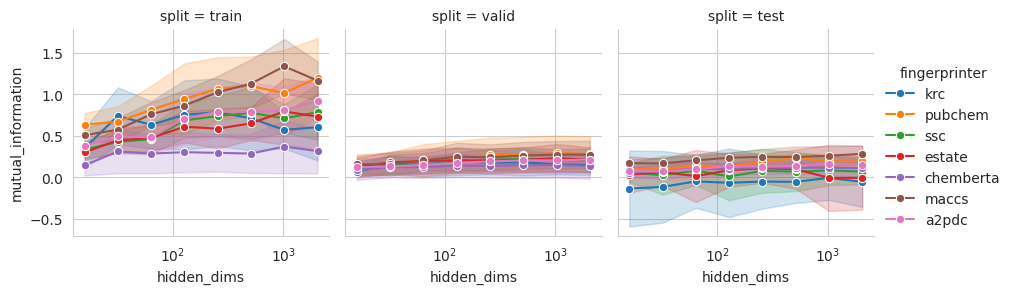

In [8]:
grid = sns.FacetGrid(run_info.merge(results, on='r_idx'), hue='fingerprinter', col='split')
grid.map(sns.lineplot, 'hidden_dims', 'mutual_information', marker='o', errorbar='sd')
grid.axes[0,0].set_xscale('log')
grid.add_legend()
plt.savefig('figures/sider_hidden_dims.png')

/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/tmp/ipykernel_4037/1956597602.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_4037/1956597602.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_4037/1956597602.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


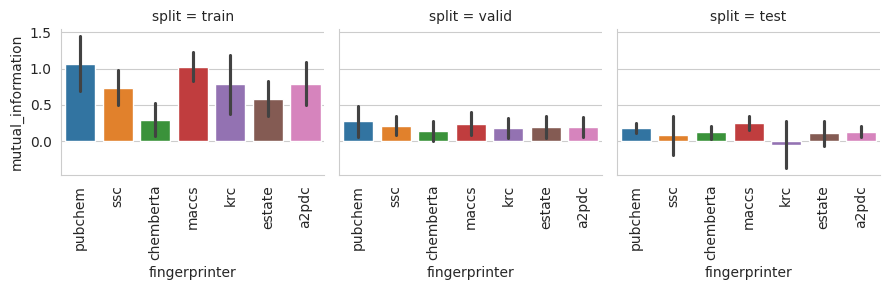

In [9]:
J = run_info.merge(results, on='r_idx')
J = J[J['hidden_dims']==256]
grid = sns.FacetGrid(J, hue='fingerprinter', col='split')
grid.map(sns.barplot, 'fingerprinter', 'mutual_information', errorbar='sd')
for ax in grid.axes[0]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('figures/sider_base.png')